# Network Visualization of Association Rules


In the context of Market Basket Analysis, Association Rules can be described as a set of relationships between the items
that are purchased from the customers.
* Apriori Algorithm:
    * Support - The ratio of all transactions at which a specific item appears.

    * Confidence - **Conf(A, B) = Support(A, B) / Support(A)**

    * Lift - The probability of purchasing item B when item A is sold. **p(B; A) = Support(A, B) / (Support(A) * Support(B))**
    
Dataset - [E-commerce platform generated transactions](http://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx)


[Additional Information on Apriori](https://www.kaggle.com/code/parisanahmadi/how-to-solve-the-apriori-algorithm-in-a-simple-way)

In [31]:
from efficient_apriori import apriori

transactions = [
    ('milk', 'bread'),
    ('bread', 'butter'),
    ('milk', 'bread', 'butter'),
    ('bread',),
    ('milk', 'bread', 'jam')
]

itemsets, rules = apriori(transactions, min_support=0.3, min_confidence=0.5)

print(itemsets)
print(rules)

{1: {('milk',): 3, ('bread',): 5, ('butter',): 2}, 2: {('bread', 'butter'): 2, ('bread', 'milk'): 3}}
[{butter} -> {bread}, {milk} -> {bread}, {bread} -> {milk}]


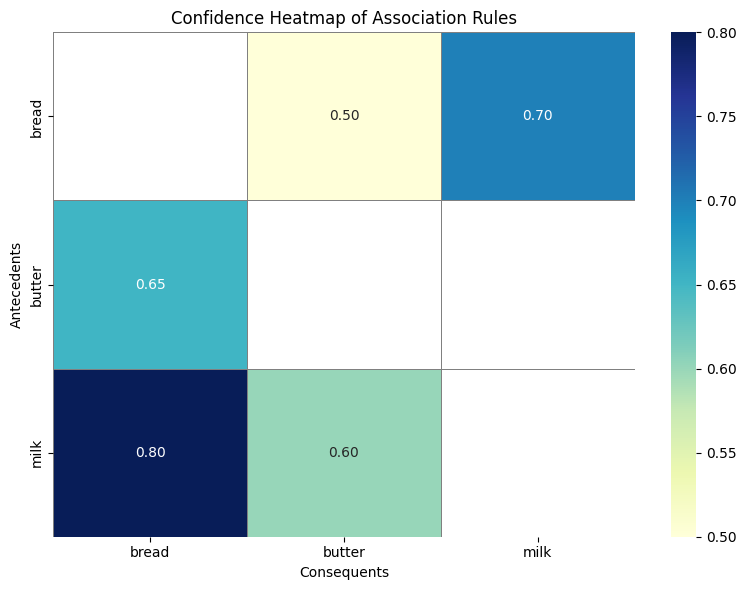

In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example data: rules generated from the apriori algorithm
# Normally you'd use mlxtend's apriori and association_rules functions to generate this
# Here's a mockup DataFrame
rules = pd.DataFrame({
    'antecedents': ['milk', 'milk', 'bread', 'bread', 'butter'],
    'consequents': ['bread', 'butter', 'milk', 'butter', 'bread'],
    'confidence': [0.8, 0.6, 0.7, 0.5, 0.65],
    'lift': [1.2, 1.1, 1.3, 0.9, 1.15]
})

# Pivot the data into matrix format for heatmap
heatmap_data = rules.pivot(index='antecedents', columns='consequents', values='confidence')

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=0.5, linecolor='gray')
plt.title('Confidence Heatmap of Association Rules')
plt.ylabel('Antecedents')
plt.xlabel('Consequents')
plt.tight_layout()
plt.show()


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import os

In [9]:
# Please refer to requirements.txt for a full list of packages
# pip install networkx

In [ ]:
# !pip install efficient_apriori
# !pip install networkx
from efficient_apriori import apriori

In [11]:
# Load data
if os.path.exists('online_retail.csv'):
    df = pd.read_csv('online_retail.csv')
else:
    df = pd.read_excel('http://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx')

    df.to_csv('online_retail.csv')

df.describe(include='all')

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909.000000,541909,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,NaN,25900,4070,4223,NaN,23260,NaN,NaN,38
top,NaN,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2011-10-31 14:41:00,NaN,NaN,United Kingdom
freq,NaN,1114,2313,2369,NaN,1114,NaN,NaN,495478
mean,270954.000000,NaN,NaN,NaN,9.552250,NaN,4.611114,15287.690570,NaN
std,156435.797851,NaN,NaN,NaN,218.081158,NaN,96.759853,1713.600303,NaN
min,0.000000,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,135477.000000,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000,NaN
50%,270954.000000,NaN,NaN,NaN,3.000000,NaN,2.080000,15152.000000,NaN
75%,406431.000000,NaN,NaN,NaN,10.000000,NaN,4.130000,16791.000000,NaN


In [12]:
df = df[['InvoiceNo', 'Description']]
df.isnull().sum()

InvoiceNo         0
Description    1454
dtype: int64

In [13]:
df= df.dropna(subset=['Description'])
df.head()

,InvoiceNo,Description
0,536365,WHITE HANGING HEART T-LIGHT HOLDER
1,536365,WHITE METAL LANTERN
2,536365,CREAM CUPID HEARTS COAT HANGER
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE
4,536365,RED WOOLLY HOTTIE WHITE HEART.


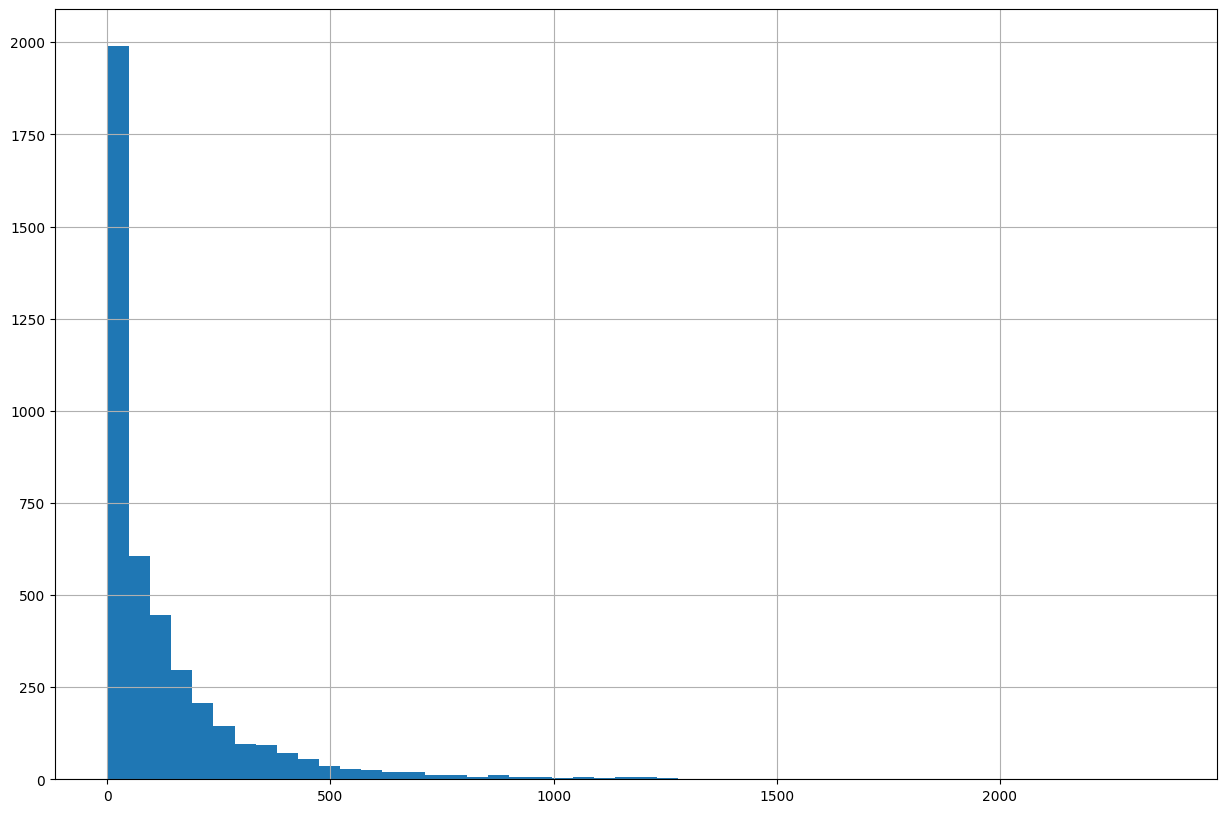

In [14]:
hist = df['Description'].value_counts().hist(bins=50, figsize = (15,10))

In [15]:
# Group sold items according their Invoice Number
grouped_transac = df.groupby('InvoiceNo').agg(list)
grouped_transac.head()

,Description
InvoiceNo,
536365,"[WHITE HANGING HEART T-LIGHT HOLDER, WHITE MET..."
536366,"[HAND WARMER UNION JACK, HAND WARMER RED POLKA..."
536367,"[ASSORTED COLOUR BIRD ORNAMENT, POPPY'S PLAYHO..."
536368,"[JAM MAKING SET WITH JARS, RED COAT RACK PARIS..."
536369,[BATH BUILDING BLOCK WORD]


In [16]:
def clean_transactions(items):
    cleaned = list()
    for item in items:
        # print(item)
        # Most of the values are string but there are some item numbers 
        cleaned.append(str(item).strip(' .'))
    return tuple(cleaned)
transactions = grouped_transac['Description'].apply(clean_transactions).tolist()

In [17]:
# A shorthand way to implement the procedure above
clean_transac = lambda t_list: tuple([x.strip(' .') for x in t_list])

# transactions = grouped_transac['Description'].apply(clean_transac).tolist()
transactions = grouped_transac['Description'].apply(clean_transactions).tolist()
print(transactions[0])

('WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN', 'CREAM CUPID HEARTS COAT HANGER', 'KNITTED UNION FLAG HOT WATER BOTTLE', 'RED WOOLLY HOTTIE WHITE HEART', 'SET 7 BABUSHKA NESTING BOXES', 'GLASS STAR FROSTED T-LIGHT HOLDER')


In [18]:
# Run apriori
%time itemsets, rules = apriori(transactions, min_support=0.007, min_confidence=0.70, verbosity=1)

Generating itemsets.
 Counting itemsets of length 1.
  Found 4210 candidate itemsets of length 1.
  Found 960 large itemsets of length 1.
 Counting itemsets of length 2.
  Found 460320 candidate itemsets of length 2.
  Found 1430 large itemsets of length 2.
 Counting itemsets of length 3.
  Found 5911 candidate itemsets of length 3.
  Found 503 large itemsets of length 3.
 Counting itemsets of length 4.
  Found 301 candidate itemsets of length 4.
  Found 75 large itemsets of length 4.
 Counting itemsets of length 5.
  Found 11 candidate itemsets of length 5.
  Found 3 large itemsets of length 5.
 Counting itemsets of length 6.
  Found 0 candidate itemsets of length 6.
Itemset generation terminated.

Generating rules from itemsets.
 Generating rules of size 2.
 Generating rules of size 3.
 Generating rules of size 4.
 Generating rules of size 5.
Rule generation terminated.

CPU times: user 2.27 s, sys: 43.2 ms, total: 2.31 s
Wall time: 2.33 s


In [19]:
# Print top 10 rules with highest confidence
for rule in sorted(rules, key=lambda rule: rule.confidence)[-10:]:
  print(rule)

{HERB MARKER CHIVES, HERB MARKER ROSEMARY} -> {HERB MARKER PARSLEY} (conf: 0.968, supp: 0.008, lift: 99.054, conv: 31.357)
{HERB MARKER CHIVES, HERB MARKER THYME} -> {HERB MARKER PARSLEY} (conf: 0.968, supp: 0.008, lift: 99.054, conv: 31.357)
{HERB MARKER CHIVES, HERB MARKER MINT, HERB MARKER THYME} -> {HERB MARKER ROSEMARY} (conf: 0.972, supp: 0.007, lift: 98.570, conv: 35.051)
{HERB MARKER BASIL, HERB MARKER MINT, HERB MARKER PARSLEY, HERB MARKER THYME} -> {HERB MARKER ROSEMARY} (conf: 0.972, supp: 0.007, lift: 98.586, conv: 35.249)
{HERB MARKER CHIVES, HERB MARKER PARSLEY, HERB MARKER THYME} -> {HERB MARKER ROSEMARY} (conf: 0.973, supp: 0.007, lift: 98.679, conv: 36.437)
{HERB MARKER CHIVES, HERB MARKER PARSLEY, HERB MARKER ROSEMARY} -> {HERB MARKER THYME} (conf: 0.973, supp: 0.007, lift: 99.923, conv: 36.442)
{BEADED CRYSTAL HEART PINK ON STICK} -> {DOTCOM POSTAGE} (conf: 0.976, supp: 0.008, lift: 33.643, conv: 40.005)
{HERB MARKER CHIVES, HERB MARKER ROSEMARY, HERB MARKER THYME} -

In [36]:
# TODO: Create a dataframe with the rules and related metrics
# see https://efficient-apriori.readthedocs.io/en/latest/index.html#efficient_apriori.Rule 
# dir(rule)

for rule in rules:

    print(rule)
    print(', '.join(rule.lhs), )
    print(', '.join(rule.rhs), )
# lhs: tuple, rhs: tuple,



{butter} -> {bread} (conf: 1.000, supp: 0.400, lift: 1.000, conv: 0.000)
butter
bread
{milk} -> {bread} (conf: 1.000, supp: 0.600, lift: 1.000, conv: 0.000)
milk
bread
{bread} -> {milk} (conf: 0.600, supp: 0.600, lift: 1.000, conv: 1.000)
bread
milk


In [20]:
# Construct the Network/Graph
network = nx.DiGraph()
all_rules = []
for n, rule in enumerate(rules[-100:]):
    # Add rule node
    rule_label = "rule {}".format(n)
    all_rules.append(rule_label)
    network.add_node(rule_label, lift=rule.lift)
    
    # Add nodes/items affecting the rule (lhs)
    network.add_edges_from([(item, rule_label) for item in rule.lhs])
    # Add nodes/items that are the outcome of the rule (rhs)
    network.add_edges_from([(rule_label, item) for item in rule.rhs])


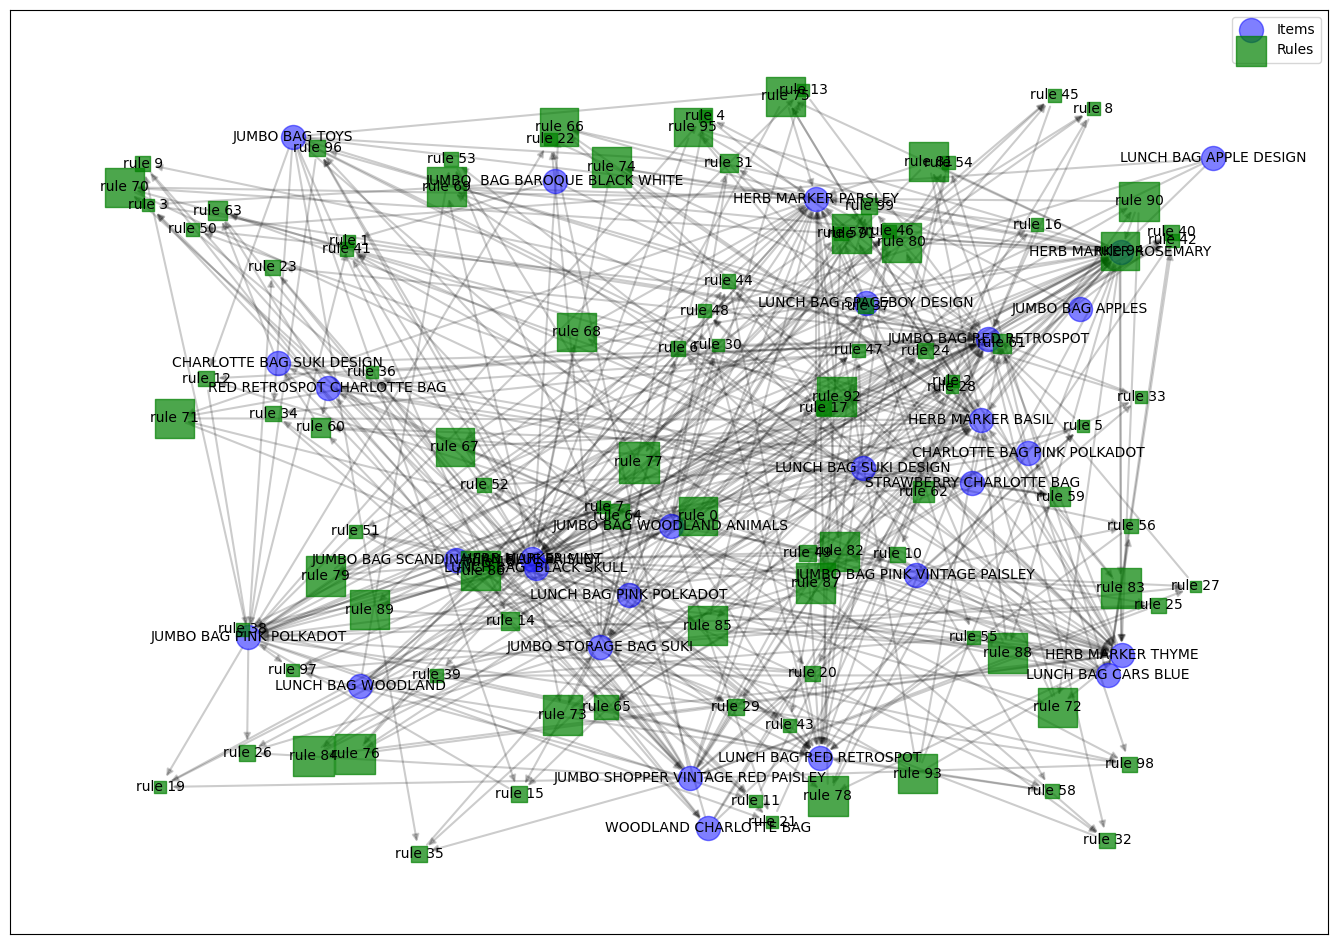

In [21]:
# Define matplotlib.pyplot axes(canvas)
_, ax = plt.subplots(figsize=(17, 12))

# nx.draw_spring(network, ax=ax)
pos = nx.random_layout(network)

# Draw edges
edges = nx.draw_networkx_edges(network, pos, alpha=0.2, width=1.5)

# Draw item nodes
nx.draw_networkx_nodes(network, 
                       pos=pos, 
                       ax=ax,
                       node_color='b',
                       alpha=0.5,
                       label='Items',
                       nodelist=[node for node in network.nodes() if node not in all_rules])

# Draw rule nodes
nx.draw_networkx_nodes(network, 
                       pos=pos, 
                       ax=ax,
                       node_color='g',
                       alpha=0.7,
                       node_shape='s',
                       label='Rules',
                       nodelist=[node for node in all_rules],
                       node_size=[8*network.nodes[rule]['lift'] for rule in all_rules])

# Draw node labels
labels = nx.draw_networkx_labels(network,pos=pos, ax=ax, font_size=10)

legend = ax.legend()

In [22]:

# Let's explore the data as network

# Calculating network metrics first

betweenness = nx.betweenness_centrality(network)
# isinstance(bb, dict)
# True
nx.set_node_attributes(network, betweenness, "betweenness")

# betweenness

degree = dict(network.degree())
nx.set_node_attributes(network, degree, "degree")





In [23]:
network.nodes(data=True)

NodeDataView({'rule 0': {'lift': 92.98271092669432, 'betweenness': 0.0003453885842116725, 'degree': 4}, 'HERB MARKER MINT': {'betweenness': 0.01692569511698738, 'degree': 31}, 'HERB MARKER PARSLEY': {'betweenness': 0.015514625553003106, 'degree': 31}, 'HERB MARKER ROSEMARY': {'betweenness': 0.015514625553003106, 'degree': 31}, 'HERB MARKER THYME': {'betweenness': 0.015514625553003106, 'degree': 31}, 'rule 1': {'lift': 9.7066836287237, 'betweenness': 0.001727386002419057, 'degree': 4}, 'JUMBO  BAG BAROQUE BLACK WHITE': {'betweenness': 0.0, 'degree': 3}, 'JUMBO BAG PINK POLKADOT': {'betweenness': 0.04019068943642859, 'degree': 29}, 'JUMBO SHOPPER VINTAGE RED PAISLEY': {'betweenness': 0.024236788691162234, 'degree': 24}, 'JUMBO BAG RED RETROSPOT': {'betweenness': 0.07405845591747319, 'degree': 38}, 'rule 2': {'lift': 10.000735185130289, 'betweenness': 0.0016310012108810281, 'degree': 4}, 'JUMBO STORAGE BAG SUKI': {'betweenness': 0.038016499271269696, 'degree': 32}, 'rule 3': {'lift': 9.44

In [24]:
# Creating a dataframe out of network nodes
df = pd.DataFrame.from_dict(network.nodes(data=True))

# pd.json_normalize(df[1])
#pd.Series(df[1].tolist())

df = pd.merge(df,pd.json_normalize(df[1]), left_index=True, right_index=True)


In [25]:
df

,0,1,lift,betweenness,degree
0,rule 0,"{'lift': 92.98271092669432, 'betweenness': 0.0...",92.982711,0.000345,4
1,HERB MARKER MINT,"{'betweenness': 0.01692569511698738, 'degree':...",NaN,0.016926,31
2,HERB MARKER PARSLEY,"{'betweenness': 0.015514625553003106, 'degree'...",NaN,0.015515,31
3,HERB MARKER ROSEMARY,"{'betweenness': 0.015514625553003106, 'degree'...",NaN,0.015515,31
4,HERB MARKER THYME,"{'betweenness': 0.015514625553003106, 'degree'...",NaN,0.015515,31
...,...,...,...,...,...
123,rule 95,"{'lift': 92.68777943368107, 'betweenness': 0.0...",92.687779,0.000534,5
124,rule 96,"{'lift': 15.56488901574198, 'betweenness': 0.0...",15.564889,0.003193,5
125,rule 97,"{'lift': 10.164899870955407, 'betweenness': 0....",10.164900,0.001332,5
126,rule 98,"{'lift': 15.248898528383732, 'betweenness': 0....",15.248899,0.003426,5


<Axes: xlabel='degree', ylabel='betweenness'>

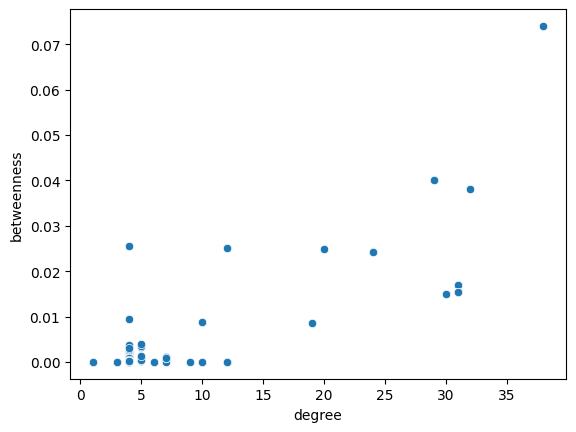

In [27]:
import seaborn as sns
sns.scatterplot(data=df, x="degree", y="betweenness")

In [30]:
# select nodes with high degree and betweenness
df.sort_values(by=['degree', 'betweenness'], ascending=False).head(10)





#print('Thank you')

,0,1,lift,betweenness,degree
9,JUMBO BAG RED RETROSPOT,"{'betweenness': 0.07405845591747319, 'degree':...",NaN,0.074058,38
11,JUMBO STORAGE BAG SUKI,"{'betweenness': 0.038016499271269696, 'degree'...",NaN,0.038016,32
1,HERB MARKER MINT,"{'betweenness': 0.01692569511698738, 'degree':...",NaN,0.016926,31
2,HERB MARKER PARSLEY,"{'betweenness': 0.015514625553003106, 'degree'...",NaN,0.015515,31
3,HERB MARKER ROSEMARY,"{'betweenness': 0.015514625553003106, 'degree'...",NaN,0.015515,31
4,HERB MARKER THYME,"{'betweenness': 0.015514625553003106, 'degree'...",NaN,0.015515,31
94,HERB MARKER BASIL,"{'betweenness': 0.014895632573459607, 'degree'...",NaN,0.014896,30
7,JUMBO BAG PINK POLKADOT,"{'betweenness': 0.04019068943642859, 'degree':...",NaN,0.040191,29
8,JUMBO SHOPPER VINTAGE RED PAISLEY,"{'betweenness': 0.024236788691162234, 'degree'...",NaN,0.024237,24
56,LUNCH BAG RED RETROSPOT,"{'betweenness': 0.024871891013623294, 'degree'...",NaN,0.024872,20


In [ ]:
# Task: Try to improve the network visualization

# Task: Plug in an LLM that provides recommendations based on the rules

In [42]:
# Pick random item from a list
import random
def pick_random_item(item_list):
    return random.choice(item_list)

pick_random_item(['A', "J", "D"])
# pick_random_item(['milk', 'bread', 'butter', 'jam'])

'A'